In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("C:\\Users\\Srinidhi Tarigoppula\\Chinnu\\Mini Project\\AAPL.xls")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600


In [4]:
df1=df.reset_index()['Close']
df1.head()

0    0.128348
1    0.121652
2    0.112723
3    0.115513
4    0.118862
Name: Close, dtype: float64

In [5]:
df1=df1[7000:]

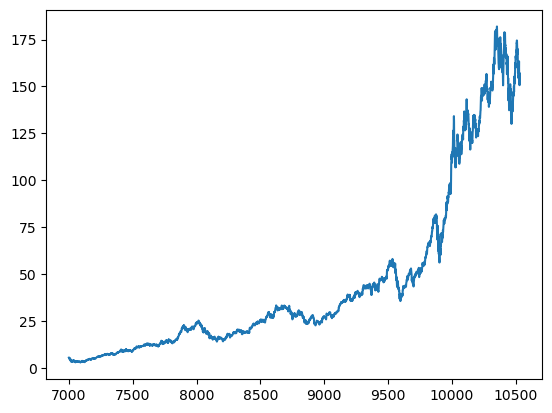

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np
df1.head()

7000    5.414643
7001    5.451786
7002    5.319286
7003    5.012857
7004    4.995714
Name: Close, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.0146291 ]
 [0.01483635]
 [0.01409703]
 ...
 [0.82529574]
 [0.84638746]
 [0.85989063]]


In [9]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(2295, 1237)

In [10]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(2194, 100)
(2194,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(1136, 100)
(1136,)


(None, None)

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#reshaping it into 3 dimensions, since the  last 2 dim will be as a input in LSTM
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
35/35 [==============================] - 21s 246ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 2/100
35/35 [==============================] - 3s 72ms/step - loss: 4.2717e-05 - val_loss: 0.0037
Epoch 3/100
35/35 [==============================] - 2s 71ms/step - loss: 3.0345e-05 - val_loss: 0.0047
Epoch 4/100
35/35 [==============================] - 2s 60ms/step - loss: 2.9492e-05 - val_loss: 0.0038
Epoch 5/100
35/35 [==============================] - 2s 61ms/step - loss: 2.9342e-05 - val_loss: 0.0043
Epoch 6/100
35/35 [==============================] - 2s 63ms/step - loss: 2.7799e-05 - val_loss: 0.0036
Epoch 7/100
35/35 [==============================] - 2s 60ms/step - loss: 2.7903e-05 - val_loss: 0.0046
Epoch 8/100
35/35 [==============================] - 2s 59ms/step - loss: 2.8277e-05 - val_loss: 0.0047
Epoch 9/100
35/35 [==============================] - 2s 60ms/step - loss: 2.6005e-05 - val_loss: 0.0036
Epoch 10/100
35/35 [==============================] - 2s 61ms/step

In [14]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

36/36 [==============================] - 1s 17ms/step


22.146929744493505

In [15]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

105.82280060634646

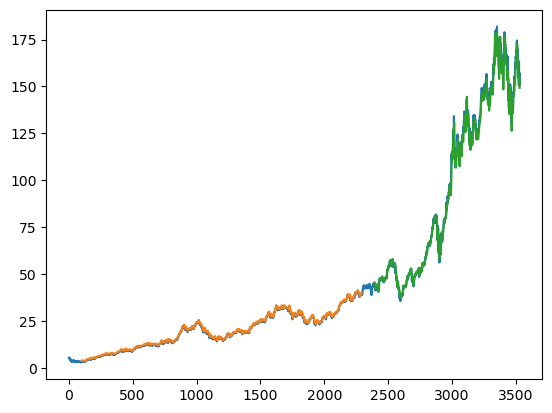

<Figure size 640x480 with 0 Axes>

In [16]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
plt.savefig('plot.jpg')
# model.save("saved_model.h5")

In [17]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 896)

In [18]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.2297193530676737,
 0.22927295602722994,
 0.22786405617078875,
 0.22504623971843585,
 0.22561817720803015,
 0.23397394617472353,
 0.23677782422794852,
 0.2378937945097639,
 0.24071158864282277,
 0.24404553319002337,
 0.24669596051690101,
 0.2446174706796177,
 0.24689125433974957,
 0.25655828741110687,
 0.2509226768256951,
 0.2477003287486937,
 0.24498014804811807,
 0.2473236850819479,
 0.24767242405132034,
 0.2493882142008093,
 0.25118771844241816,
 0.2550656957818398,
 0.25692099267872476,
 0.2573952720972477,
 0.2592226587169359,
 0.2635470330968013,
 0.26271004841066037,
 0.2642723934136254,
 0.2619428170982175,
 0.2618312206280183,
 0.2623334047439146,
 0.26236130944128794,
 0.26777374382577185,
 0.2687920560365159,
 0.26972667647443405,
 0.2738417907332054,
 0.2733954160120557,
 0.2707728933825514,
 0.2694058422024349,
 0.26983827294463325,
 0.26434214678732343,
 0.27808246776042145,
 0.2761713614687899,
 0.27979825790991036,
 0.27523674661069525,
 0.2673971001590261,
 0.2674528

In [ ]:
import dash
import dash_core_components as  dcc
import dash_html_components as html
from datetime import datetime as dt
import yfinance as yf
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
# model
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras import layers
from sklearn.svm import SVR


def get_stock_price_fig(df):

    fig = px.line(df,
                  x="Date",
                  y=["Close", "Open"],
                  title="Closing and Opening Price vs Date")

    return fig


def get_more(df):
    df['EWA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    fig = px.scatter(df,
                     x="Date",
                     y="EWA_20",
                     title="Exponential Moving Average vs Date")
    fig.update_traces(mode='lines+markers')
    return fig


app = dash.Dash(
    __name__,
    external_stylesheets=[
        "https://fonts.googleapis.com/css2?family=Roboto&display=swap"
    ])
server = app.server
# html layout of site
app.layout = html.Div(
    [
        html.Div(
            [
                # Navigation
                html.P("Welcome to the Stock Prediction App!", className="start"),
                html.Div([
                    html.P("Input stock code: "),
                    html.Div([
                        dcc.Input(id="dropdown_tickers", type="text"),
                        html.Button("Submit", id='submit'),
                    ],
                             className="form")
                ],
                         className="input-place"),
                html.Div([
                    dcc.DatePickerRange(id='my-date-picker-range',
                                        min_date_allowed=dt(1995, 8, 5),
                                        max_date_allowed=dt.now(),
                                        initial_visible_month=dt.now(),
                                        end_date=dt.now().date()),
                ],
                         className="date"),
                html.Div([
                    html.Button(
                        "Stock Price", className="stock-btn", id="stock"),
                    html.Button("Indicators",
                                className="indicators-btn",
                                id="indicators"),
                    dcc.Input(id="n_days",type="text",
                              placeholder="number of days"),
                    html.Button(
                        "Forecast", className="forecast-btn", id="forecast")
                ],
                         className="buttons"),
                # here
            ],
            className="nav"),

        # content
        html.Div(
            [
                html.Div(
                    [  # header
                        html.Img(id="logo"),
                        html.P(id="ticker")
                    ],
                    className="header"),
                html.Div(id="description", className="decription_ticker"),
                html.Div([], id="graphs-content"),
                html.Div([], id="main-content"),
                html.Div([], id="forecast-content")
            ],
            className="content"),
    ],
    className="container")


# callback for company info
@app.callback([
    Output("description", "children"),
    Output("logo", "src"),
    Output("ticker", "children"),
    Output("stock", "n_clicks"),
    Output("indicators", "n_clicks"),
    Output("forecast", "n_clicks")
], [Input("submit", "n_clicks")], [State("dropdown_tickers", "value")])
def update_data(n, val):  # input parameter(s)
    if n == None:
        return "Hey there! Please enter a legitimate stock code to get details.", None, None, None
        # raise PreventUpdate
    else:
        if val == None:
            raise PreventUpdate
        else:
            ticker = yf.Ticker(val)
            inf = ticker.info
            df = pd.DataFrame().from_dict(inf, orient="index").T
            df[['logo_url', 'shortName', 'longBusinessSummary']]
            return df['longBusinessSummary'].values[0], df['logo_url'].values[
                0], df['shortName'].values[0], None, None, None


# callback for stocks graphs
@app.callback([
    Output("graphs-content", "children"),
], [
    Input("stock", "n_clicks"),
    Input('my-date-picker-range', 'start_date'),
    Input('my-date-picker-range', 'end_date')
], [State("dropdown_tickers", "value")])
def stock_price(n, start_date, end_date, val):
    if n == None:
        return [""]
        #raise PreventUpdate
    if val == None:
        raise PreventUpdate
    else:
        if start_date != None:
            df = yf.download(val, str(start_date), str(end_date))
        else:
            df = yf.download(val)

    df.reset_index(inplace=True)
    fig = get_stock_price_fig(df)
    return [dcc.Graph(figure=fig)]


# callback for indicators
@app.callback([Output("main-content", "children")], [
    Input("indicators", "n_clicks"),
    Input('my-date-picker-range', 'start_date'),
    Input('my-date-picker-range', 'end_date')
], [State("dropdown_tickers", "value")])
def indicators(n, start_date, end_date, val):
    if n == None:
        return [""]
    if val == None:
        return [""]

    if start_date == None:
        df_more = yf.download(val)
    else:
        df_more = yf.download(val, str(start_date), str(end_date))

    df_more.reset_index(inplace=True)
    fig = get_more(df_more)
    return [dcc.Graph(figure=fig)]


# callback for forecast
@app.callback([Output("forecast-content", "children")],
              [Input("forecast", "n_clicks")],
              [State("n_days", "value"),
               State("dropdown_tickers", "value")])
def forecast(n, n_days, val):
    if n == None:
        return [""]
    if val == None:
        raise PreventUpdate
    fig = model.predict(val, int(n_days) + 1)
    return [dcc.Graph(figure=fig)]


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Oct/2022 16:01:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:50] "GET /_dash-component-suites/dash_renderer/react@16.v1_1_2m1576595738.8.6.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:50] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_1_2m1576595738.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:50] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_1_2m1576595738.8.6.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:50] "GET /_dash-component-suites/dash_core_components/highlight.v1_3_1m1576595950.pack.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:50] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_0_1m1576596177.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:50] "GET /_dash-component-suites/dash_renderer/dash_renderer.v1_1_2m1576595738.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:50] "GET /_da

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1519, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1517, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1503, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\dash\dash.py", line 1078, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "

127.0.0.1 - - [24/Oct/2022 16:01:50] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [24/Oct/2022 16:01:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:01:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:02:15] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [24/Oct/2022 16:02:15] "POST /_dash-update-component HTTP/1.1" 200 -


[*********************100%***********************]  1 of 1 completed


127.0.0.1 - - [24/Oct/2022 16:02:21] "POST /_dash-update-component HTTP/1.1" 200 -


[*********************100%***********************]  1 of 1 completed

127.0.0.1 - - [24/Oct/2022 16:02:22] "POST /_dash-update-component HTTP/1.1" 200 -



[*********************100%***********************]  1 of 1 completed

127.0.0.1 - - [24/Oct/2022 16:02:31] "POST /_dash-update-component HTTP/1.1" 200 -



Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1519, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1517, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1503, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\dash\dash.py", line 1078, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File 

127.0.0.1 - - [24/Oct/2022 16:02:42] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1519, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1517, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1503, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\dash\dash.py", line 1078, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "

127.0.0.1 - - [24/Oct/2022 16:02:42] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1519, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1517, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\flask\app.py", line 1503, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\dash\dash.py", line 1078, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "

127.0.0.1 - - [24/Oct/2022 16:02:42] "POST /_dash-update-component HTTP/1.1" 500 -
